In [1]:
import sys
sys.path.append("..\\..\\python\\")

#Jseq = "GCTCAGTGGTGTACGGTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTCGACGACGGCGT"
#Pseq = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAATTGAAACTCCGGCTTGTCGACGACGGCGT"
Jonly = "CTGACAGCTAGCTCAGTCCTAGGTATAATGCTAGC"
Ponly = "TTTCAATTTAATCATCCGGCTCGTATAATGTGTGGA"
beginner =     "CAAGCCCATTATTACCCTGTTATCCCTAGACACCAATCAGAGGCCACA"#"TCGACGACGGCGTG")
attBsiteU21R = "CCCAGCAGGTATGATCCTGACGACGGAGCACGCCGTCGTCGACAAGCC"#"AGTTCGTAGACGGA")
U21primerend = "GTACAAACCAGTAGCTAGCATTATACCTAGGACTGAGCTAGCTGTCAGCTCCGGCTTGTC"+\
                "GACGACGGCGTGCTCCGTCGTCAGGATCATACCTGCTGGGAGTTCGTAGACGGA"

U22primerend = "GCTCAGTGGTGTACGGTACAAACCAGTATCCACACATTATACGAGCCGGATGATTAAAT"+\
                "TGAAACTCCGGCTTGTCGACGACGGCGTGCTCCGTCGTCAGGATCATACCTAACAAACGCAGAATCCAAGC"


barcodes = {
    "BC01":"AAGAAAGTTGTCGGTGTCTTTGT",
    "BC02":"TCGATTCCGTTTGTAGTCGTCTG",
    "BC03":"GAGTCTTGTGTCCCAGTTACCAG",
    "BC04":"TTCGGATTCTATCGTGTTTCCCT",
    "BC05":"CTTGTCCAGGGTTTGTGTAACCT",
    "BC06":"TTCTCGCAAAGGCAGAAAGTAGT",
    "BC07":"GTGTTACCGTGGGAATGAATCCT",
    "BC08":"TTCAGGGAACAAACCAAGTTACG",
    "BC09":"AACTAGGCACAGCGAGTCTTGGT",
    "BC10":"AAGCGTTGAAACCTTTGTCCTCT",
    "BC11":"GTTTCATCTATCGGAGGGAATGG",
    "BC12":"CAGGTAGAAAGAAGCAGAATCGG",
    "BC13":"AGAACGACTTCCATACTCGTGTG",
    "BC14":"AACGAGTCTCTTGGGACCCATAG",
    "BC15":"AGGTCTACCTCGCTAACACCACT"
    }
import importlib
from nanopore_scripts import *
for bc in barcodes:
    barcodes[bc]= (barcodes[bc],rc(barcodes[bc]))
print("done")

done


In [2]:


#print(barcodes)
#print(rc(Jseq))
#U21primerend = U21primerend[:86]
i = 3
processreads = 5000
#testread = rc(testread)[slicing[0]:slicing[1]] #[298+86-12:298+86+86+12]#[130:212]
seqstats = [0,0,0]
attb_detection_threshold = len(attBsiteU21R)/5
frontchecklength = 150
""
fastqfilename = "allreads.fastq"
processreads = 300000
allseqDict,seqstats,unsorted=barcodeSplitAndCountRecords(fastqfilename,barcodes,\
                                                barcode_detection_threshold=7,\
                                                end_threshold=12,\
                                                processreads=processreads,\
                                               prefix_detection_threshold=12,\
                                               variable_sequence_threshold=12,\
                                                frontchecklength=frontchecklength)

allseqdictpart2,seqstatspart2,unsortedpart2 = barcodeSplitAndCountRecords(unsorted,barcodes,\
                                                barcode_detection_threshold=7,\
                                                end_threshold=12,\
                                                processreads=processreads,\
                                               prefix_detection_threshold=12,\
                                               variable_sequence_threshold=12,\
                                                frontchecklength=frontchecklength)

print("we had {} forward, {} reverse, and {} where we couldn't tell".format(seqstats[0],seqstats[1],seqstats[2]))
print("we had {} forward, {} reverse, and {} where we couldn't tell the second time".\
                                                      format(seqstatspart2[0],seqstatspart2[1],seqstatspart2[2]))
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsorted)))
print("now, operating on the split sequences...")
bcwefound =sorted(allseqdictpart2.keys())
numseqs = [len(allseqdictpart2[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
print("{} sequences were split from existing ones".format(len(unsortedpart2)))

for a in allseqdictpart2:
    allseqDict[a] = allseqDict[a]+allseqdictpart2[a]
print("final totals are:")
bcwefound =sorted(allseqDict.keys())
numseqs = [len(allseqDict[a]) for a in bcwefound]
[print("{}:{}".format(a[0],a[1])) for a in zip(bcwefound,numseqs)]
#print(U21primerend)
#print(allseqDict["BC01"])
#print(testread)
#help(edlib.align)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

we had 130638 forward, 17444 reverse, and 151918 where we couldn't tell
we had 334 forward, 37 reverse, and 950 where we couldn't tell the second time
BC01:27261
BC02:9595
BC03:15054
BC04:4324
BC05:23013
BC06:4459
BC07:15135
BC08:6368
BC09:18411
BC10:22475
BC11:18857
BC12:17309
BC13:32553
BC14:27981
BC15:25789
none:31416
1321 sequences were split from existing ones
now, operating on the split sequences...
BC01:11
BC02:8
BC03:8
BC04:6
BC05:4
BC06:3
BC07:9
BC08:24
BC09:18
BC10:9
BC11:9
BC12:5
BC13:10
BC14:6
BC15:18
none:1173
13 sequences were split from existing ones
final totals are:
BC01:27272
BC02:9603
BC03:15062
BC04:4330
BC05:23017
BC06:4462
BC07:15144
BC08:6392
BC09:18429
BC10:22484
BC11:18866
BC12:17314
BC13:32563
BC14:27987
BC15:25807
none:32589


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [3]:
xfile = ""
for a in allseqDict:
    xfile+="{}={}\n".format(a,allseqDict[a])
newfile = open("simprec.py","w")
newfile.write(xfile)
newfile.close()

In [129]:
import simprec190308 as simprec
conditions = ["R39_nog_5min","R39_nog_10min","R39_nog_30min","R39_nog_45min","R39_nog_60min",\
              "R39_12_5min","R39_12_10min","R39_12_30min","R39_12_45min","R39_12_60min",\
              "R39_21_5min","R39_21_10min","R39_21_30min","R39_21_45min","R39_21_60min",\
              "none"]

importlib.reload(simprec)
#print(len(simprec.BC01))
bclists = [simprec.BC01,simprec.BC02,simprec.BC03,simprec.BC04,simprec.BC05,\
           simprec.BC06,simprec.BC07,simprec.BC08,simprec.BC09,simprec.BC10,\
           simprec.BC11,simprec.BC12,simprec.BC13,simprec.BC14,simprec.BC15,\
           simprec.none]
bcnames = ["BC01","BC02","BC03","BC04","BC05",\
           "BC06","BC07","BC08","BC09","BC10",\
           "BC11","BC12","BC13","BC14","BC15","none"]
#conditions = ["R39_nog_5min","R39_nog_10min","R39_nog_30min","R39_nog_45min","R39_nog_60min",\
#              "R39_12_5min","R39_12_10min","R39_12_30min","R39_12_45min","R39_12_60min",\
#              "R39_21_5min","R39_21_10min","R39_21_30min","R39_21_45min","R39_21_60min",\
#             "none"]
bcDict = {a[0]:a[1] for a in zip(bcnames,bclists)}
PJdict = {}
letters = ["J","P","E","Q"]
for bc in bcDict:
    seqs = []
    for seq in bcDict[bc]:
        convertedseq = ""
        for element in seq:
            if(element in range(len(letters))):
                convertedseq += letters[element]
        if(convertedseq != ""):
            newseq = convertedseq [:-1]
            if(newseq != "" and len(newseq)==4):
                seqs+=[newseq]
    PJdict[bc] = seqs
#print(PJdict["BC01"])

all_lists,run_lists,switch_lists,first_last = countBarcodeStats(PJdict,chopseqs='none')
print(all_lists.keys())

dict_keys(['BC01', 'BC02', 'BC03', 'BC04', 'BC05', 'BC06', 'BC07', 'BC08', 'BC09', 'BC10', 'BC11', 'BC12', 'BC13', 'BC14', 'BC15', 'none'])


c:\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6457: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


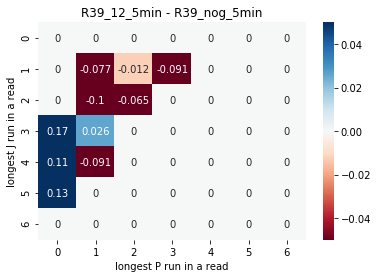

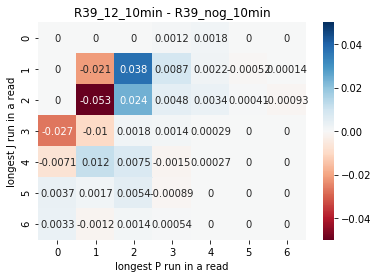

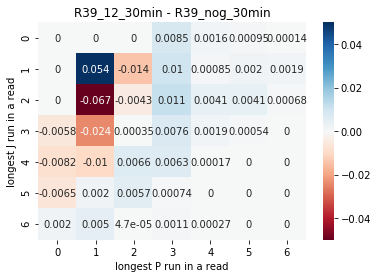

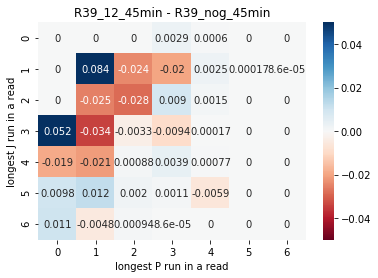

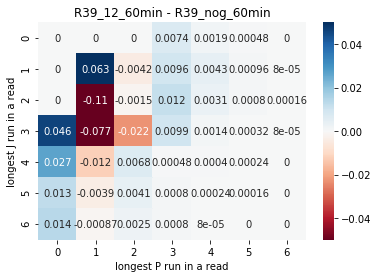

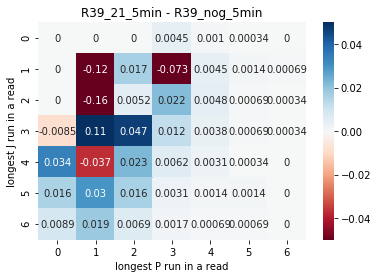

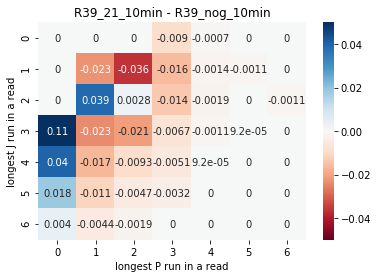

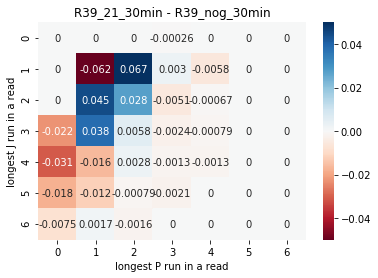

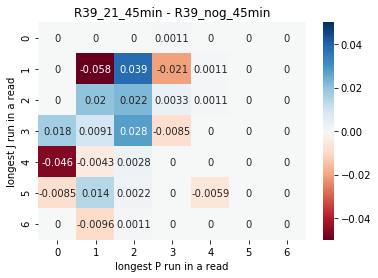

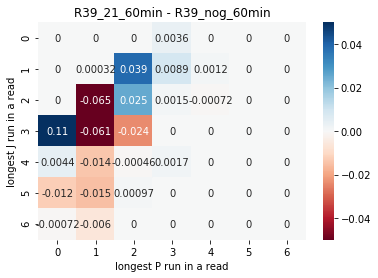

In [92]:
#dlist = all_lists
#dlist = switch_lists
dlist = run_lists
#labs = ["PJ", "JP"]
labs = ["longest P run in a read","longest J run in a read"]
#labs = ["total Ps in a read","total Js in a read"]
#crange = [0,.01,6]
crange = [0,.02,1]
sqrange = [-.5,6.5]

#def diffPlotWrapper(ctrlBC,expBC,conditions,bcnames,dlist,labs=["Ps","Js"],crange=[0,.02,1],sqrange=[-.5,6.5],):
#    plt.figure()
#    control_hist1,control_hist2 = makeBCplot1(ctrlBC,crange,sqrange,conditions,bcnames,dlist,labs,makefig=False)
#    experiment_hist1,experiment_hist2 = makeBCplot1(expBC,crange,sqrange,conditions,bcnames,dlist,labs,makefig=False)
#    plt.clf()
#    diffPlot(control_hist1,experiment_hist1,labs=labs,control_barcode=ctrlBC,\
#             exp_barcode=expBC,barcodes=bcnames,conditions=conditions)

diffPlotWrapper("BC01","BC06",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC02","BC07",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC03","BC08",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC04","BC09",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist,labs=labs)

diffPlotWrapper("BC01","BC11",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist,labs=labs)
diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist,labs=labs)

#diffPlotWrapper("BC14","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC15","BC13",conditions,bcnames,dlist,labs=labs)
#diffPlotWrapper("BC05","BC10",conditions,bcnames,dlist)

#diffPlotWrapper("BC03","BC13",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC14",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC15",conditions,bcnames,dlist)

#diffPlotWrapper("BC02","BC12",conditions,bcnames,dlist)
#diffPlotWrapper("BC05","BC09",conditions,bcnames,dlist)
#diffPlotWrapper("BC04","BC08",conditions,bcnames,dlist)



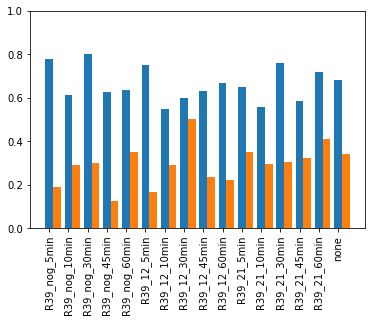

In [52]:
plotbcnames = bcnames #[:10]
ticks = np.arange(len(plotbcnames))-.4
secondticks = np.arange(len(plotbcnames))
first_barcode = [first_last[a][0]/float(first_last[a][2]) for a in plotbcnames]
second_barcode = [first_last[a][1]/float(first_last[a][2]) for a in plotbcnames]
plt.bar(ticks,first_barcode,.4)
plt.bar(secondticks,second_barcode,.4)
plt.ylim(0,1)
#plt.legend(["first","last"])
plt.xticks(ticks,conditions,rotation=90)
pass

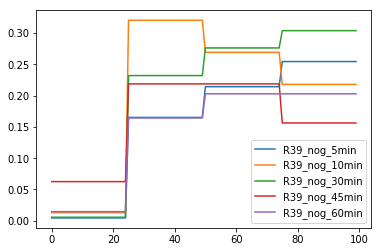

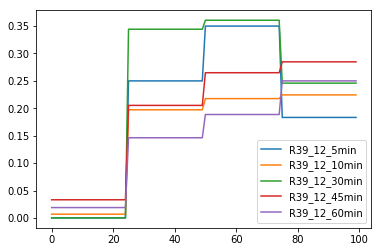

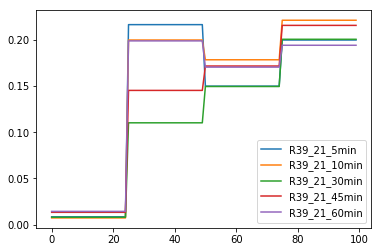

In [130]:
stretch = True
def recorderplots(bclist,letters="PJ",stretch=True):
    legendlist = []
    for bc in bclist:
        x,y,z = quantifyRecOrder(PJdict[bc],letters=letters,stretch=stretch)
        plt.plot(z)
        legendlist += [conditions[bcnames.index(bc)]]
    plt.legend(legendlist)

'''    
recorderplots(["BC01","BC02"])
plt.figure()

recorderplots(["BC03","BC04","BC05","BC06"])
plt.figure()

recorderplots(["BC07","BC08","BC09","BC10"])    
    
''
recorderplots(["BC07","BC10","BC13"])
plt.figure()

recorderplots(["BC08","BC11","BC14"])
plt.figure()

recorderplots(["BC09","BC12","BC15"])

'''
recorderplots(["BC01","BC02","BC03","BC04","BC05"])
plt.figure()
recorderplots(["BC06","BC07","BC08","BC09","BC10"])
plt.figure()
recorderplots(["BC11","BC12","BC13","BC14","BC15"])
#'''